In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sks


In [ ]:
data = pd.read_csv("Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
d={"rice": 0, "maize":1,"chickpea":2,"kidneybeans":3,"pigeonpeas":4,"mothbeans":5,"mungbean":6,"blackgram":7,"lentil":8,"pomegranate":9,"banana":10,"mango":11,"grapes":12,"watermelon":13,"muskmelon":14,"apple":15,"orange":16,"papaya":17,"coconut":18,"cotton":19,"jute":20,"coffee":21}

In [ ]:
def tell_key(v):
    k = list(d.values()).index(v)
    return list(d.keys())[k]

In [ ]:
data["label"] = data["label"].map(d)

In [ ]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


<Axes: >

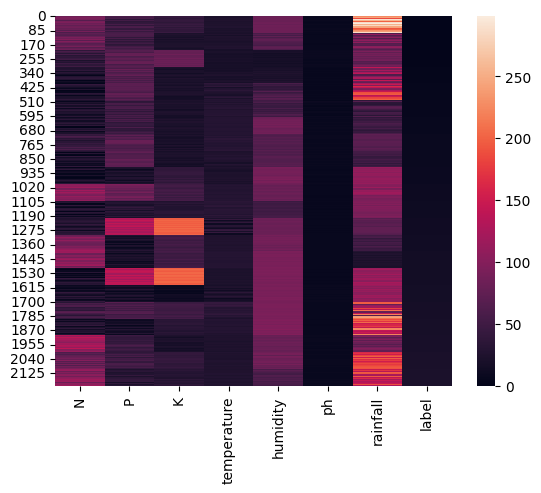

In [ ]:
sns.heatmap(data)

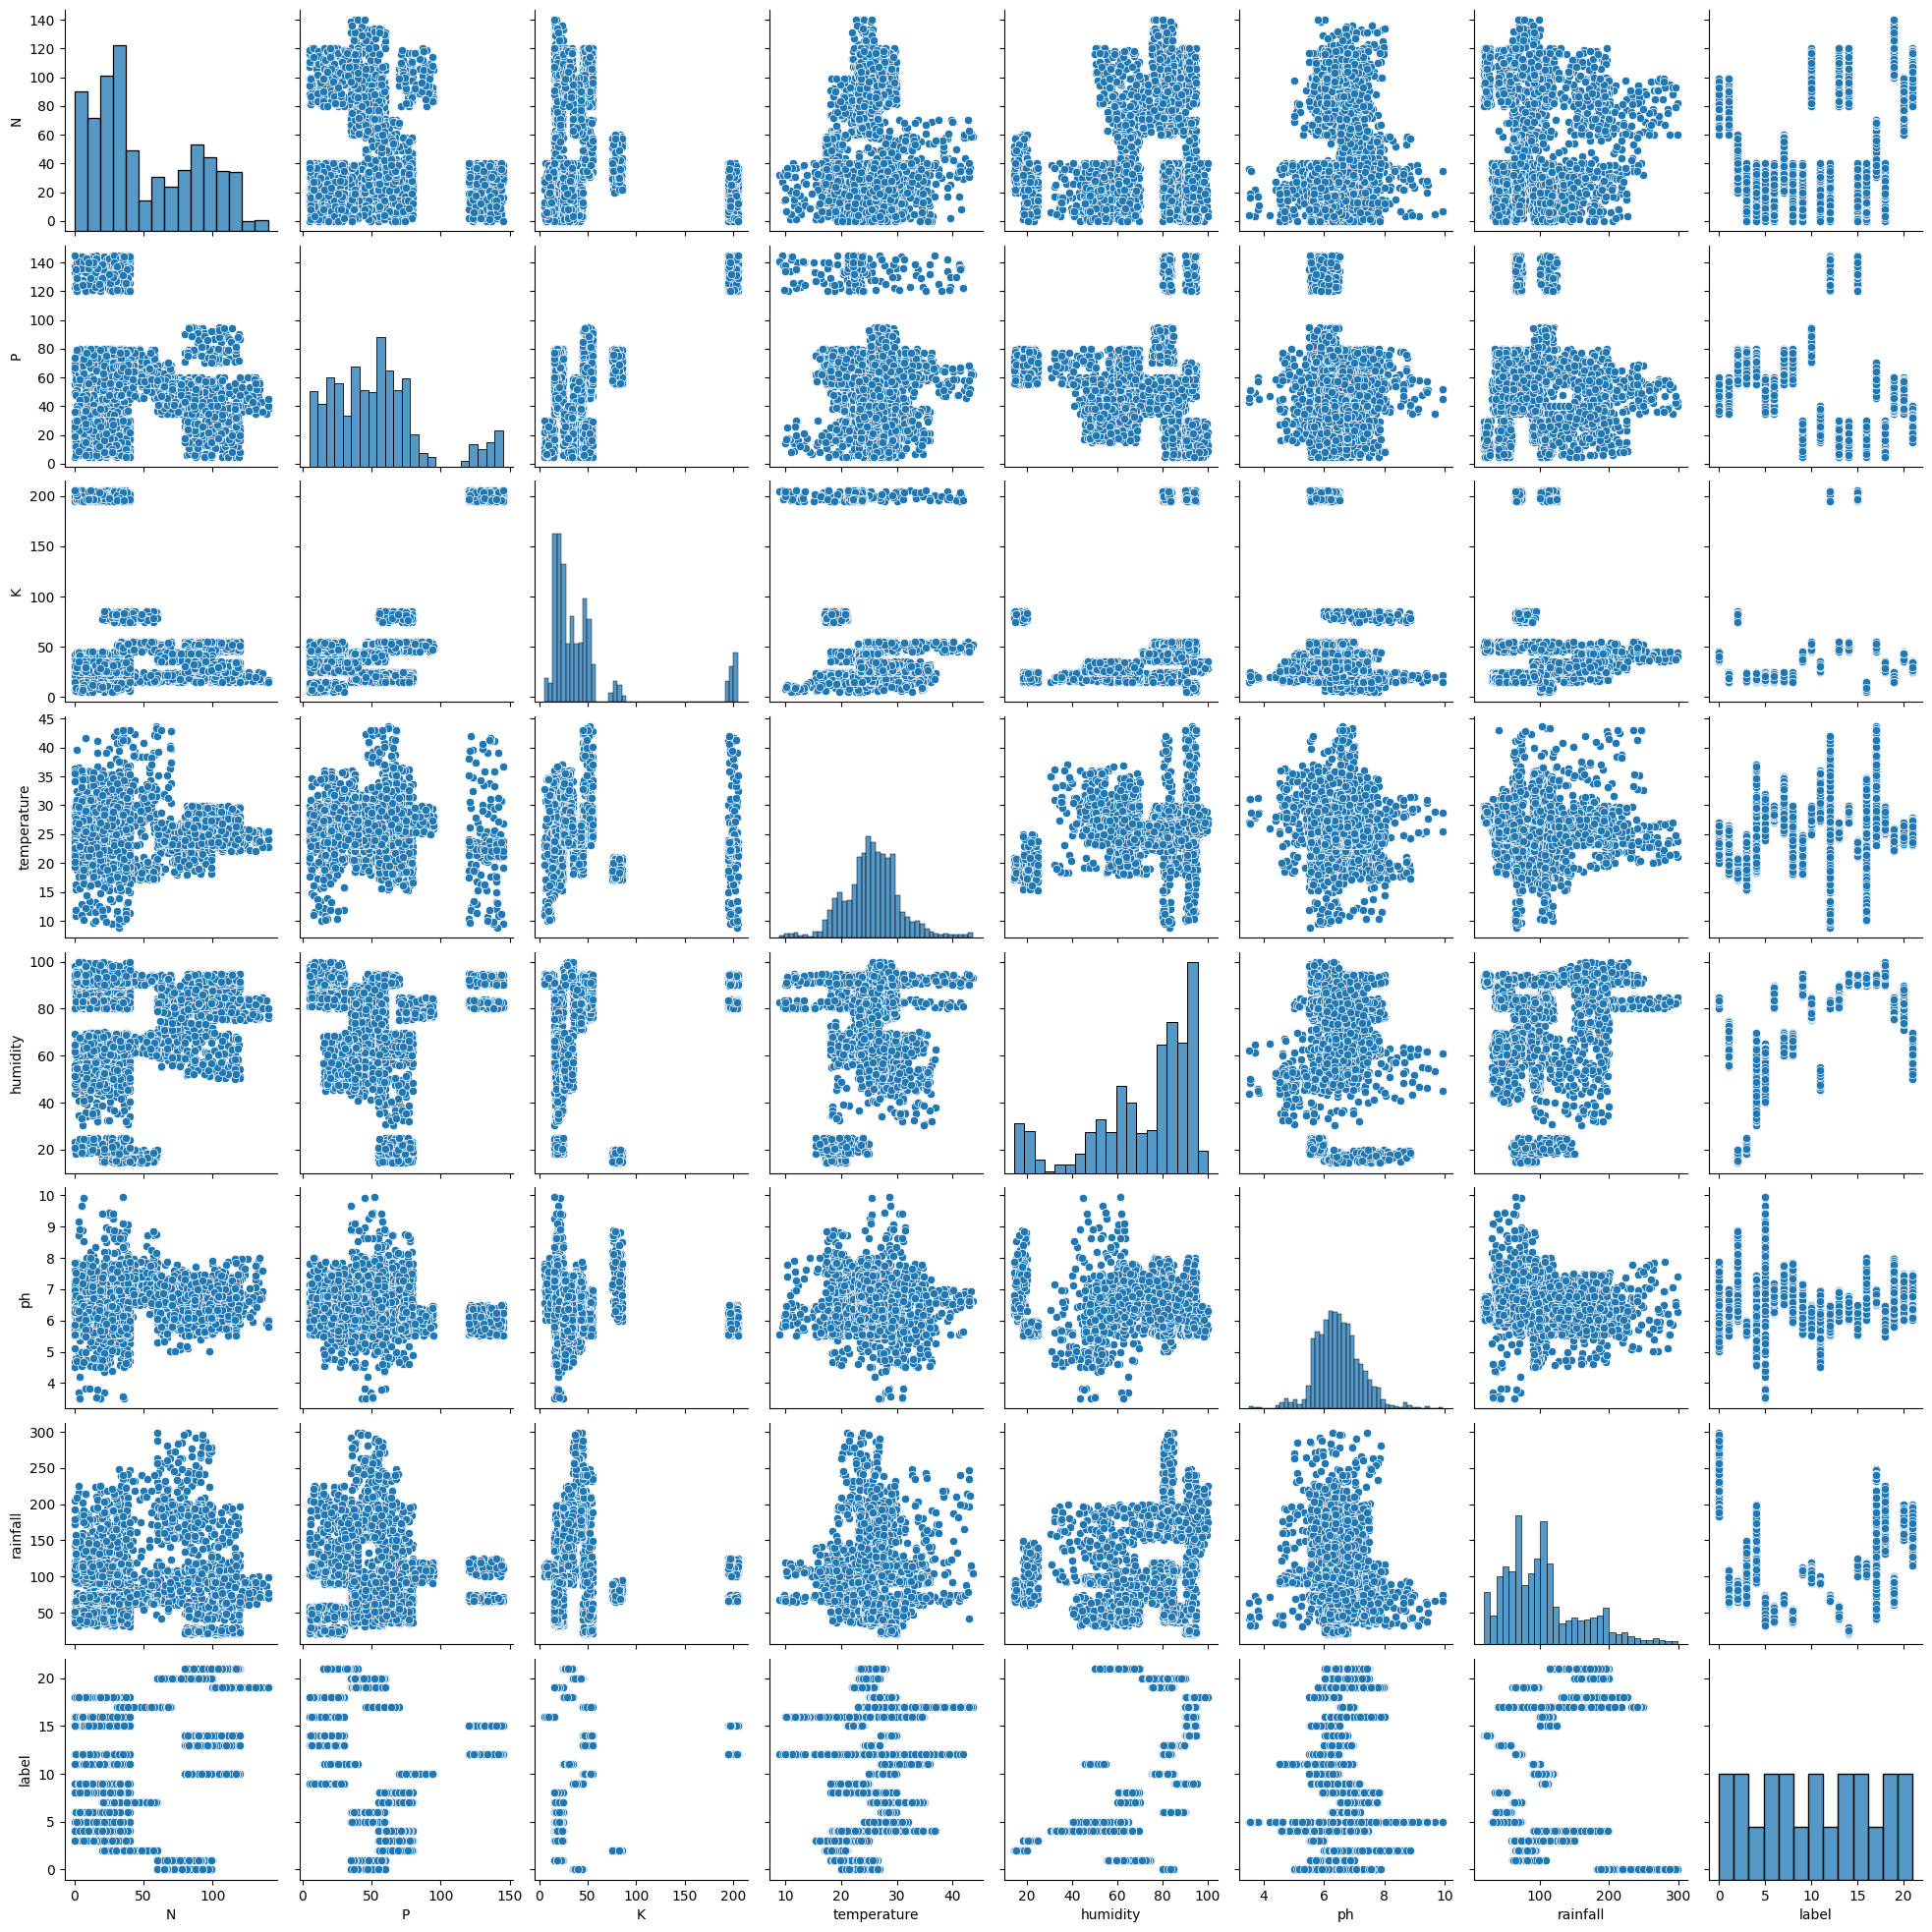

In [ ]:
sns.pairplot(data)

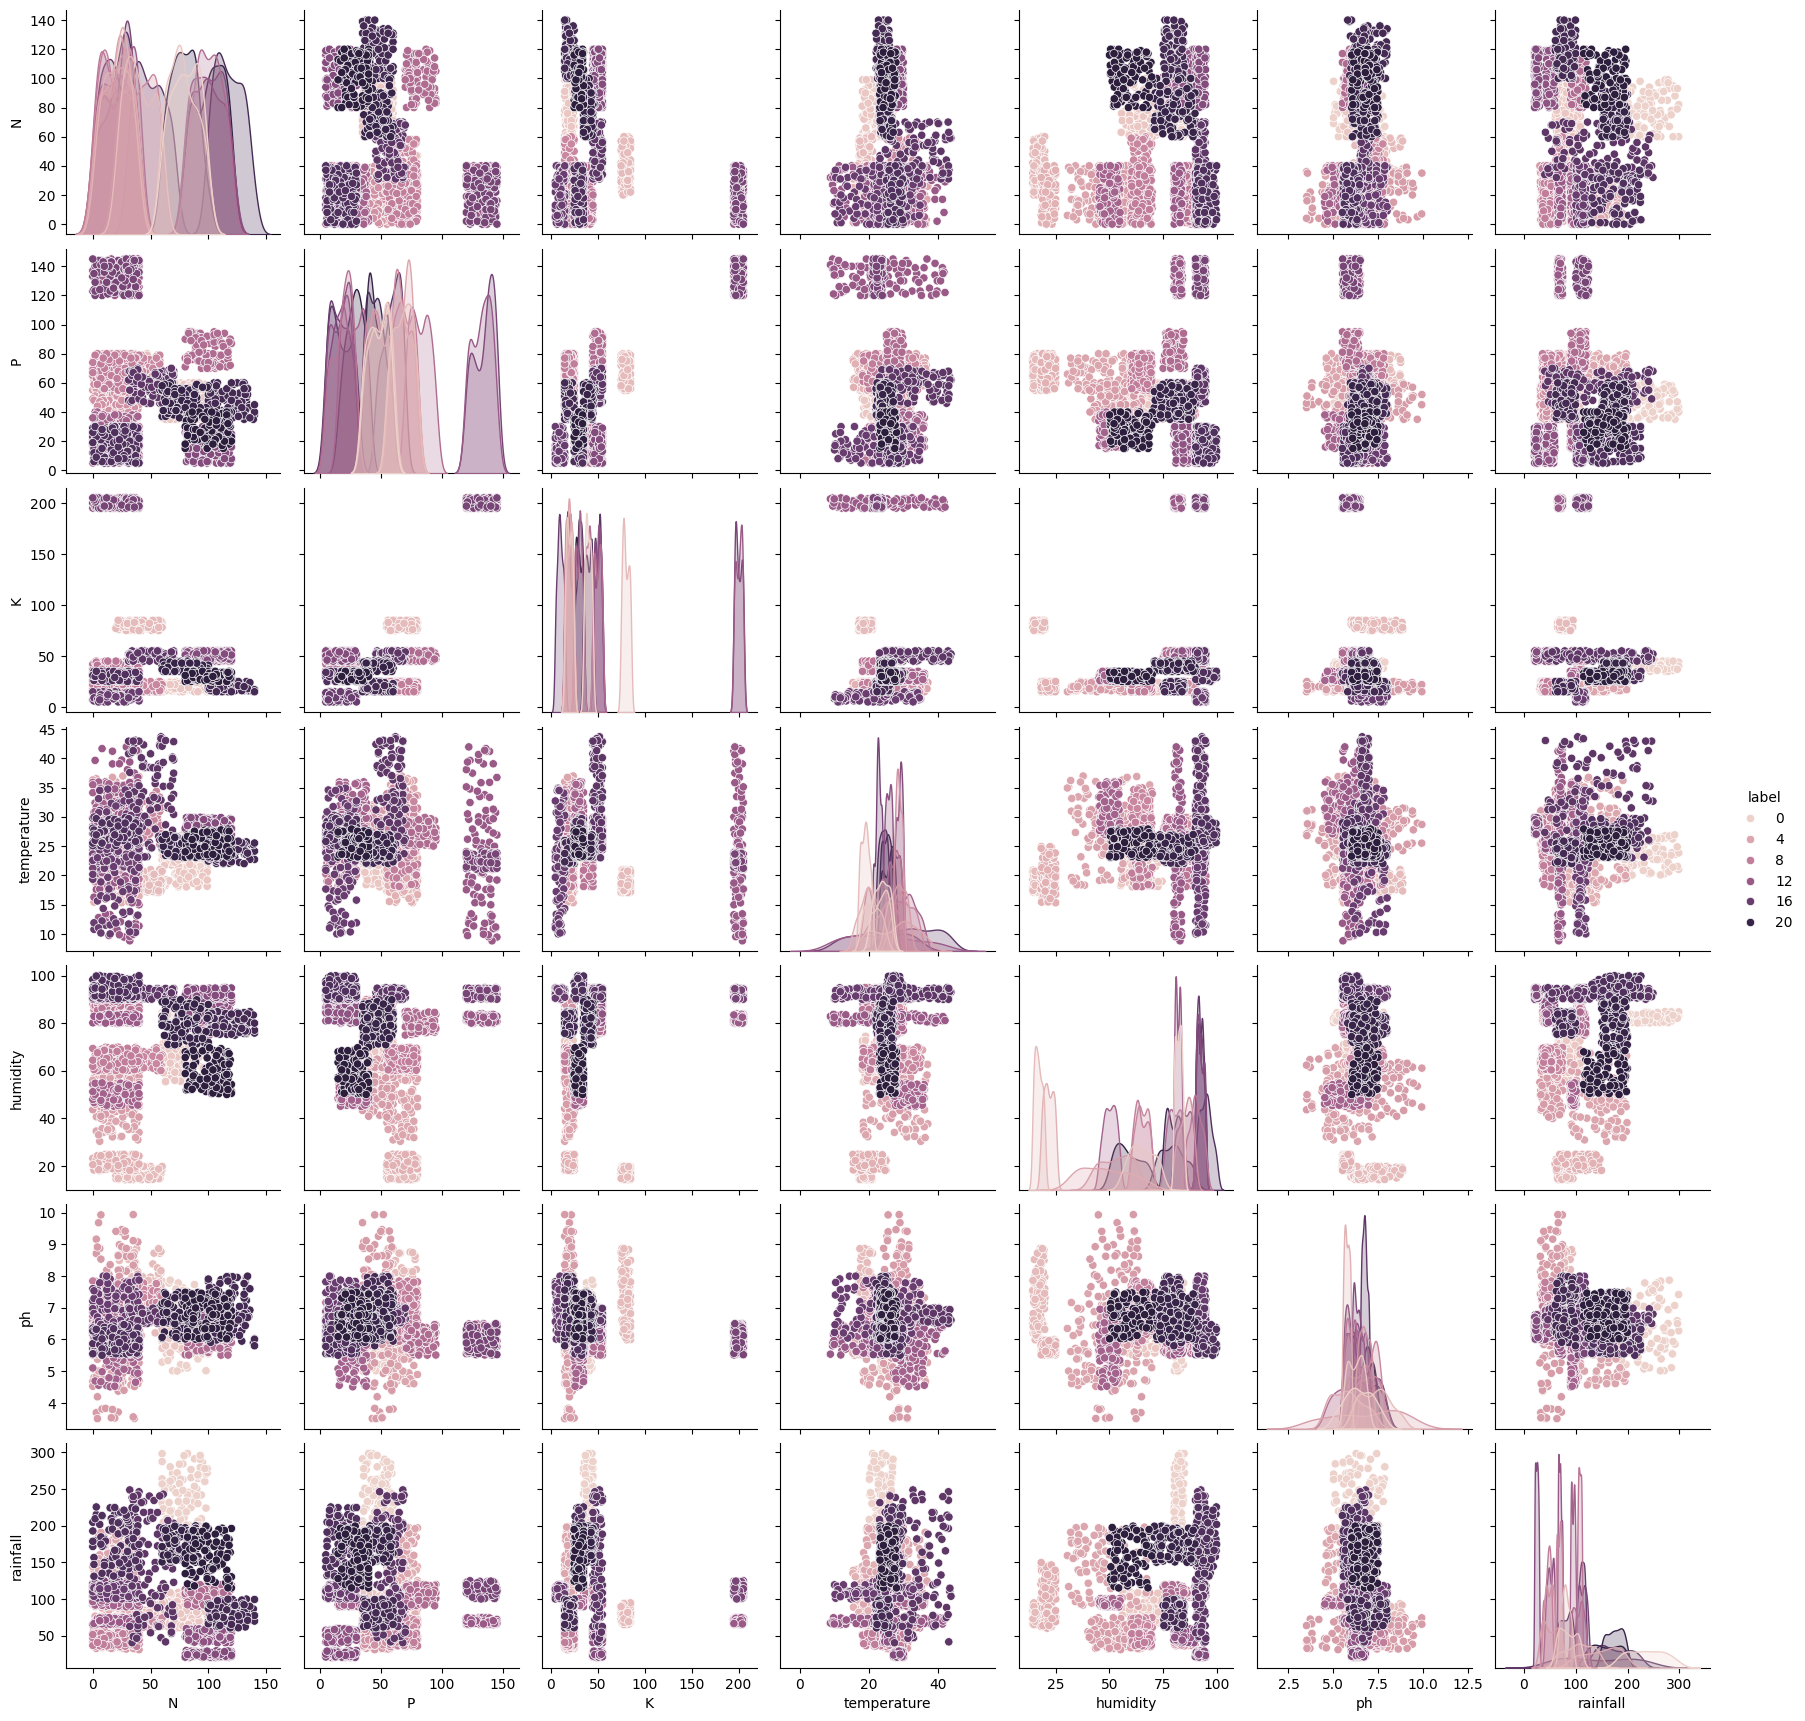

In [ ]:
sns.pairplot(data,hue="label")

In [ ]:
x = data.drop(columns=['label'])
y=data.label

In [ ]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [ ]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1567,27,120,200,21.452787,90.745319,6.110219,116.703658
2031,81,36,38,23.765547,87.983299,6.334838,150.316615
2073,90,59,35,24.251335,89.864541,7.098228,175.174211
1374,81,16,45,26.904357,86.254262,6.727468,59.759800
279,47,80,77,17.182484,16.428918,7.561108,72.850173
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [ ]:
y_train

1567    15
2031    20
2073    20
1374    13
279      2
        ..
1033    10
1731    17
763      7
835      8
1653    16
Name: label, Length: 1760, dtype: int64

In [ ]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
446,32,70,20,20.893427,46.248565,6.208843,195.569787
1005,93,94,53,25.866324,84.423793,6.079179,114.535750
1919,117,56,15,25.992374,77.054355,7.368258,89.118821
708,27,64,21,32.842130,68.684015,7.543804,73.671662


In [ ]:
y_test

1320    13
1367    13
1291    12
264      2
728      7
        ..
446      4
1005    10
1919    19
708      7
1546    15
Name: label, Length: 440, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-0.64463185,  2.00512125,  2.96466347, ...,  0.86301256,
        -0.4785779 ,  0.23692732],
       [ 0.81334894, -0.52889759, -0.2035231 , ...,  0.7381018 ,
        -0.18240887,  0.84590226],
       [ 1.05634574,  0.1649409 , -0.26219322, ...,  0.82317986,
         0.82415091,  1.29625399],
       ...,
       [-0.42863469,  0.31577536, -0.65332736, ..., -0.36751109,
         0.03555503, -0.61777686],
       [-0.32063612,  0.34594225, -0.4968737 , ..., -0.11470255,
         1.59909782, -1.13413007],
       [-0.99562722, -0.95123406, -0.7706676 , ...,  0.880759  ,
         0.09231399,  0.1609325 ]], shape=(1760, 7))

In [ ]:
y_train_scaled = y_train.to_numpy()
y_test_scaled = y_test.to_numpy()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(100,activation="relu",input_dim=7))
model.add(Dense(50,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(22,activation="softmax"))

c:\Users\HP\Downloads\crop_Recommendation_System-main\.venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │           572 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,697 (30.07 KB)

 Trainable params: 7,697 (30.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled,y_train_scaled,epochs=50, validation_split=0.2)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2322 - loss: 2.9279 - val_accuracy: 0.3608 - val_loss: 2.6481
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4531 - loss: 2.1559 - val_accuracy: 0.5341 - val_loss: 1.6612
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7273 - loss: 1.1768 - val_accuracy: 0.7983 - val_loss: 0.8648
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8679 - loss: 0.6059 - val_accuracy: 0.8551 - val_loss: 0.5331
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9183 - loss: 0.3761 - val_accuracy: 0.8949 - val_loss: 0.3626
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9233 - loss: 0.2715 - val_accuracy: 0.9176 - val_loss: 0.2862
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9453 - loss: 0.2092 - val_accuracy: 0.9261 - val_loss: 0.2496
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9517 - loss: 0.1738 - val_accuracy: 0.9403 - val_loss:

In [ ]:
y_prob = model.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.10454545454545454

In [ ]:
import matplotlib.pyplot as plt

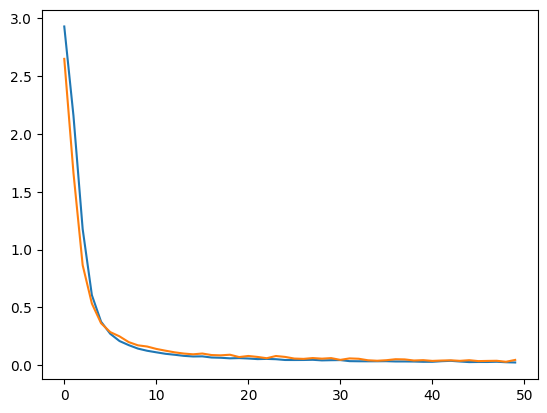

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

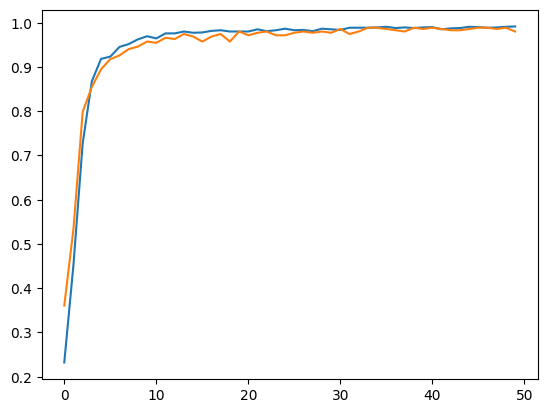

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
number = model.predict(x_test_scaled[[78]]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [ ]:
print("The actual crop is:",tell_key(number[0]))

The actual crop is: jute


In [ ]:
print("The best crop on this field is:",tell_key(y_test_scaled[78]))

The best crop on this field is: jute


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)


In [ ]:
model2.fit(x_train_scaled,y_train_scaled)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = model2.predict(x_test_scaled)

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64

In [ ]:
accuracy_score(y_test_scaled,y_pred)

0.9772727272727273

# svm

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(x_train_scaled,y_train_scaled)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred = clf.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test_scaled,y_pred)

0.9772727272727273

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
r = RandomForestClassifier()  

In [ ]:
r.fit(x_train_scaled, y_train_scaled)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = r.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test_scaled,y_pred)

0.9977272727272727

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
t = DecisionTreeClassifier()

In [ ]:
t.fit(x_train_scaled,y_train_scaled)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred = t.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test_scaled,y_pred)

0.9863636363636363

In [ ]:
import numpy as np

# New sample dataset
samples = np.array([
    [50, 55, 40, 22.5, 75.0, 6.0, 180.0],
    [70, 35, 48, 25.0, 68.0, 6.3, 150.0],
    [30, 90, 60, 28.7, 72.0, 7.2, 210.0],
    [85, 25, 35, 19.0, 80.0, 5.7, 260.0],
    [15, 45, 25, 16.0, 88.0, 5.9, 320.0]
])

for i, sample in enumerate(samples, start=1):
    prediction = model.predict(sample.reshape(1, -1))
    predicted_crop = list(d.keys())[np.argmax(prediction)]
    print(f"Sample {i} → Recommended Crop: {predicted_crop}")
